# CLASSIFICATION ANALYSIS ON YEARLY INCOME DATASET.

<a id="pb"> </a>
## 1.Problem Statement

The average income of a person in any country is determined by number of factors such as Age, Educational level, Occupation, Economy of the country, etc. A similar dataset has been taken by us containing records of US indiviuals. The problem statement here is to determine whether an indiviual earns more than 50,000 US Dollars or less than 50,000 US Dollars. Assumptions made for the following dataset is that the data provided is for One year and currency is US Dollars.

<a id="dd"></a>
## 2.Data Definition

**1.Age:** Age of the indiviual in years.(Numeric)

**2.Workclass:** Type of organisation indiviual is working for-Government, Private or Self-Employed.(Categoric)

**3.fnlwgt:** Final weight as assigned by central beareu(Non-standarised data), classify the indiviuals into groups. It means that indiviuals having same fnlwgt have same characteristics and likely to be of same class.(Numeric)

**4:Education:** Education level of the indiviual.(Categoric)

**5:Educational Number:** Classifying Education level with numbers.(Numeric)

**6:Marital status:** Marital status of the indiviual.(Categoric)

**7:Occupation:** Work done by the indiviual.(Categoric)

**8:Relationship:** Position held by the person in the family.(Categoric)

**9:Race:** Black or White.(Categoric)

**10:Gender:** Male or female.(Categoric)

**11:Capital-loss / Capital-gain:** Capital loss or gained in that year.(Numeric)

**12:Hours-per-Week:** Working hours in a week.(Numeric)

**13:Native-country:** Could be US or minority.(Numeric)


### Tools Used:

**Python**,  **Numpy**,  **Pandas**,  **Scikit-learn**,  **Matplotlib**,  **Seaborn**


<a id="il"></a>
## 3.Importing Libraries

In [62]:
#Numpy for array and lists, pandas for data manipulation.
import pandas as pd
import numpy as np

#Matplotlib and seaborn to plot the graphs and gaining insights.
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn to use KNN Algorithm in our data.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

import warnings
warnings.filterwarnings('ignore')

<a id="ed"></a>
## 4.Exploring the Dataset

**Problem:** What are the properties of data?

In [63]:
#Reading the file.
data=pd.read_csv('Income_data.csv')

#Previewing the files and columns of the dataset.
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [64]:
#Finding the shape of the dataset i.e. Number of rows and columns.
data.shape

(48842, 15)

**Inference:** The dataset contains 48,842 rows and 15 columns, hence the rows and columns ratio is adequate. It is seen that 14 factors contribute to the income of an indiviual in USA. We'll explore the data to validate our Hypothesis.

In [65]:
data.fnlwgt.unique() 

array([226802,  89814, 336951, ..., 129912, 255835, 257302], dtype=int64)

In [66]:
#Further information about the datatypes,null values and total values present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


There are 6 Numeric columns and 9 categorical columns. Columns are classified into correct datatype, therefore no need to change them.

In [67]:
#To know the properties of the data where the datatype is Categorical.
data.describe(include=object)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [68]:
#To know the properties of Numeric columns.
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Inference:** The data shows that working class in US population is majorly consists of male and is between 17-90 years with an median age of 37 years.The mean working hours per week is 40 and indiviuals are employed by Private organisation. The maximum number of people are educated till High-School, are married and native white Americans. The important take-away is 76% of the population earns less than 50,000 US Dollars per year.

<a id="hmv"></a>
### 5.Handling Missing values

In [69]:
#Checking null values
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**Inference:** Python shows that no null values are present in the data but upon closer inspection of the file, we can see that the null values are present in Non-standard form i.e. as '?' and are not detected. Therefore, has to be replced with 'NaN'.  

In [70]:
#replacing '?' with Null values.
data['workclass']=data['workclass'].replace('?',np.nan)
data['occupation']=data['occupation'].replace('?',np.nan)
data['native-country']=data['native-country'].replace('?',np.nan)
data.head()
#we can see that in row 4th, values are replaced.


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [72]:
#since the null values are categorical variables, hence filling it with mode value of every column
#Since there was more than 1 mode values therfore taking the first one.
#Permanently changing it in the dataframe.
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)  #filling with highest occuring value.
data['occupation'].fillna(data['occupation'].mode()[0],inplace=True)
data['native-country'].fillna(data['native-country'].mode()[0],inplace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


<a id="ss"></a>
## 6.Statistical Summary

##### 1. Bivariate analysis of Numerical columns using Correlation.

In [125]:
#Storing all numerical columns in a variable.
numeric_col=data.select_dtypes(include=np.number)
#Finding the correlation between the columns.
corr=numeric_col.corr()
#Printing the values.
print(corr)
numeric_col.corr()

                      age  workclass  educational_num  marital_status   
age              1.000000   0.045643         0.030940       -0.263978  \
workclass        0.045643   1.000000         0.007333       -0.020870   
educational_num  0.030940   0.007333         1.000000       -0.069992   
marital_status  -0.263978  -0.020870        -0.069992        1.000000   
occupation      -0.000133   0.009841         0.072706        0.030445   
race             0.028421   0.053923         0.029239       -0.070104   
gender           0.088120   0.066672         0.009328       -0.127479   
hours_per_week   0.071558   0.042845         0.143689       -0.185567   
income           0.230369  -0.000511         0.332613       -0.199072   

                 occupation      race    gender  hours_per_week    income  
age               -0.000133  0.028421  0.088120        0.071558  0.230369  
workclass          0.009841  0.053923  0.066672        0.042845 -0.000511  
educational_num    0.072706  0.029239  0.

,age,workclass,educational_num,marital_status,occupation,race,gender,hours_per_week,income
age,1.000000,0.045643,0.030940,-0.263978,-0.000133,0.028421,0.088120,0.071558,0.230369
workclass,0.045643,1.000000,0.007333,-0.020870,0.009841,0.053923,0.066672,0.042845,-0.000511
educational_num,0.030940,0.007333,1.000000,-0.069992,0.072706,0.029239,0.009328,0.143689,0.332613
marital_status,-0.263978,-0.020870,-0.069992,1.000000,0.030445,-0.070104,-0.127479,-0.185567,-0.199072
occupation,-0.000133,0.009841,0.072706,0.030445,1.000000,-0.005210,0.042579,-0.015550,0.032550
race,0.028421,0.053923,0.029239,-0.070104,-0.005210,1.000000,0.086734,0.039694,0.070934
gender,0.088120,0.066672,0.009328,-0.127479,0.042579,0.086734,1.000000,0.228560,0.214628
hours_per_week,0.071558,0.042845,0.143689,-0.185567,-0.015550,0.039694,0.228560,1.000000,0.227687
income,0.230369,-0.000511,0.332613,-0.199072,0.032550,0.070934,0.214628,0.227687,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

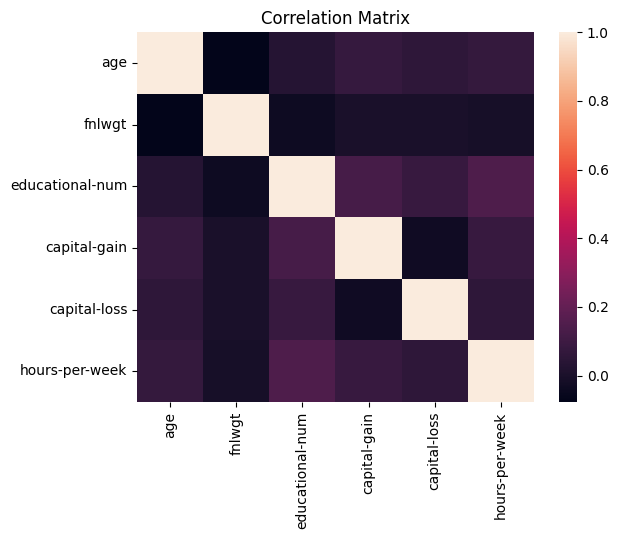

In [78]:
import seaborn as sns
sns.heatmap(corr)
plt.title('Correlation Matrix')

**Inference:** Since Fnlwgt has negetive and very small correlation with all other columns, therefore it will be better suited to drop it. Similar case applies to capital loss and capital gain. Important take-away here is the correlation values of education number with capital gain and hours per week. As higher education contributed to more hours of work along with greater capital gain.

##### 2. Bivariate analysis for categorical columns.

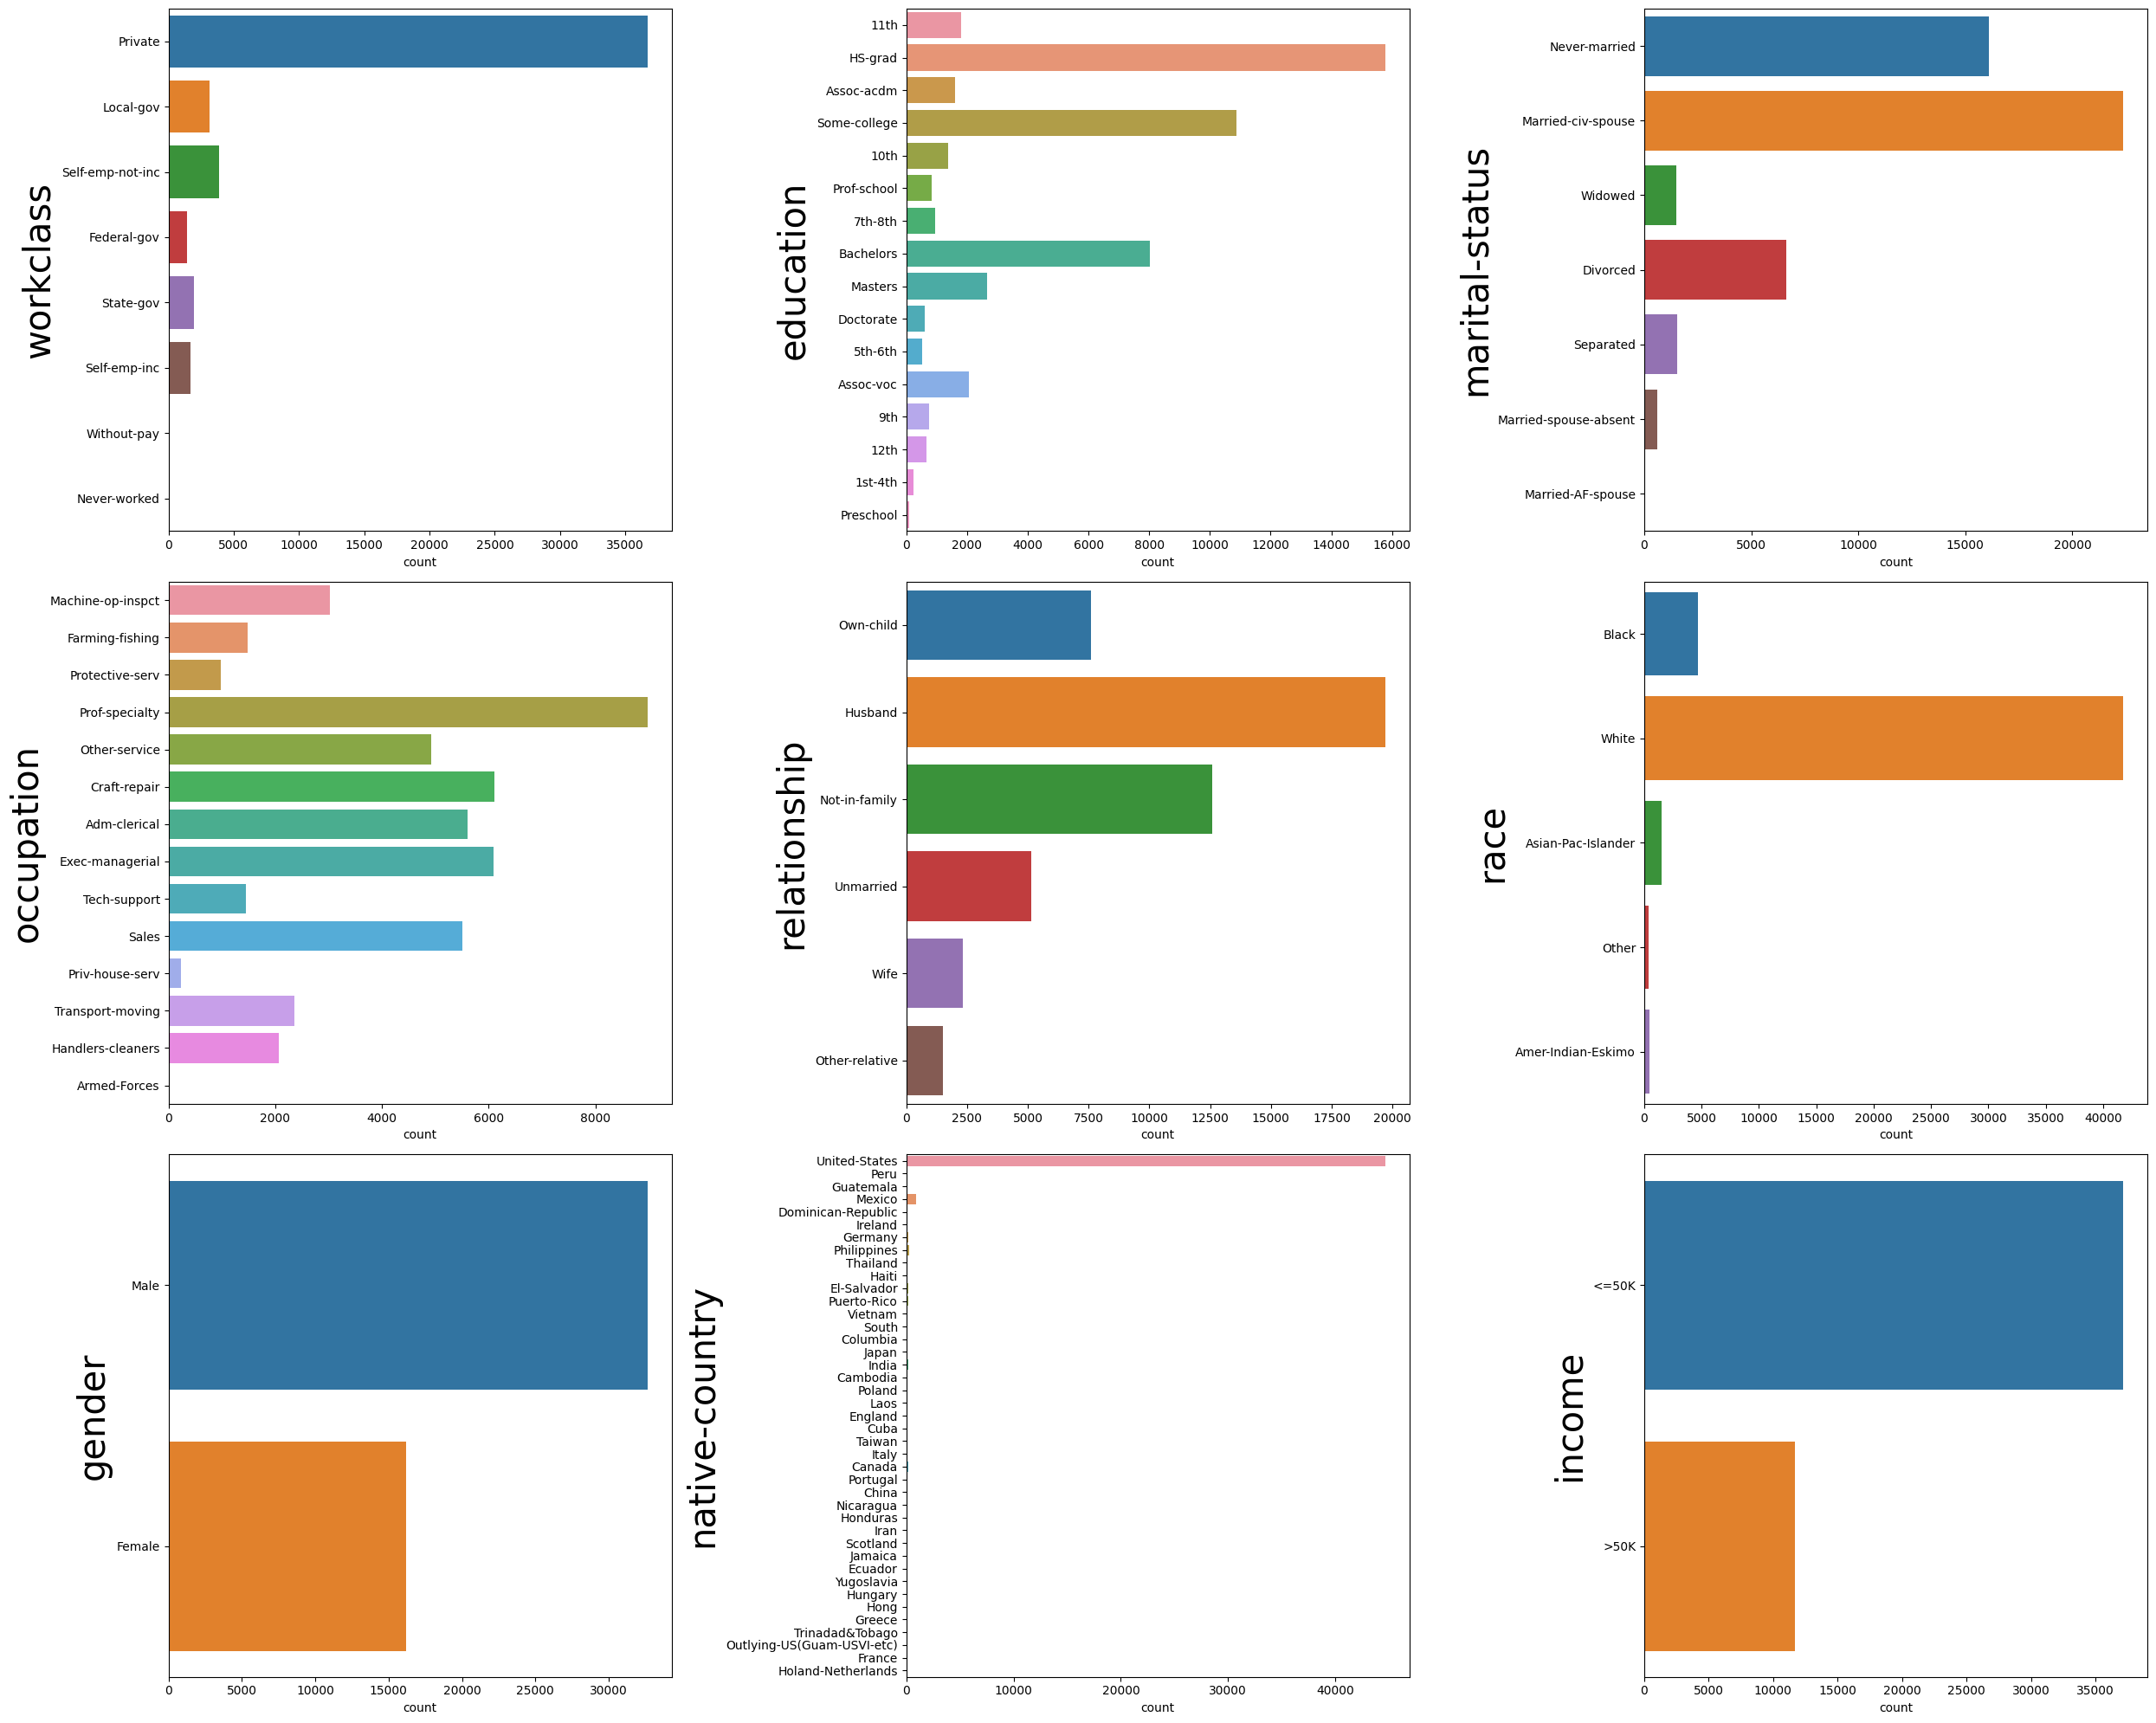

In [80]:
#creating a list of all categorical columns.
cat_col=data.select_dtypes(include=object)
fig,ax = plt.subplots(3,3,figsize=(25,20))

#running a loop to plot all the categorical-count.
for variable,subplot in zip(cat_col,ax.flatten()):
    countplot=sns.countplot(y=data[variable], ax=subplot)
    #naming the plot as the column-name.
    countplot.set_ylabel(variable, fontsize=30)
    
plt.tight_layout()
#printing the plot.
plt.show()


Since, our target variable is income therfore, we are more interested to see its relation with **Age**, **Education level**, **Work-hour**, **Work-class**  and **Occupation**.

<a id="atf"></a>
## 7.Analyzing Relationship between Target and Features Columns.

#### 1. Distribution of Target variable in Data.

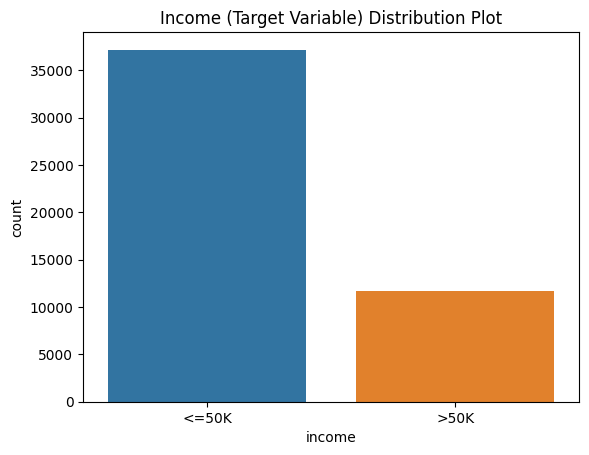

In [81]:
#Count of people earning more and less than $50,000 per year.
percentage=(37155/48842)*100
sns.countplot(data,x='income')
plt.title('Income (Target Variable) Distribution Plot')
plt.ylabel('count')

plt.show()


Text(0, 0.5, 'count')

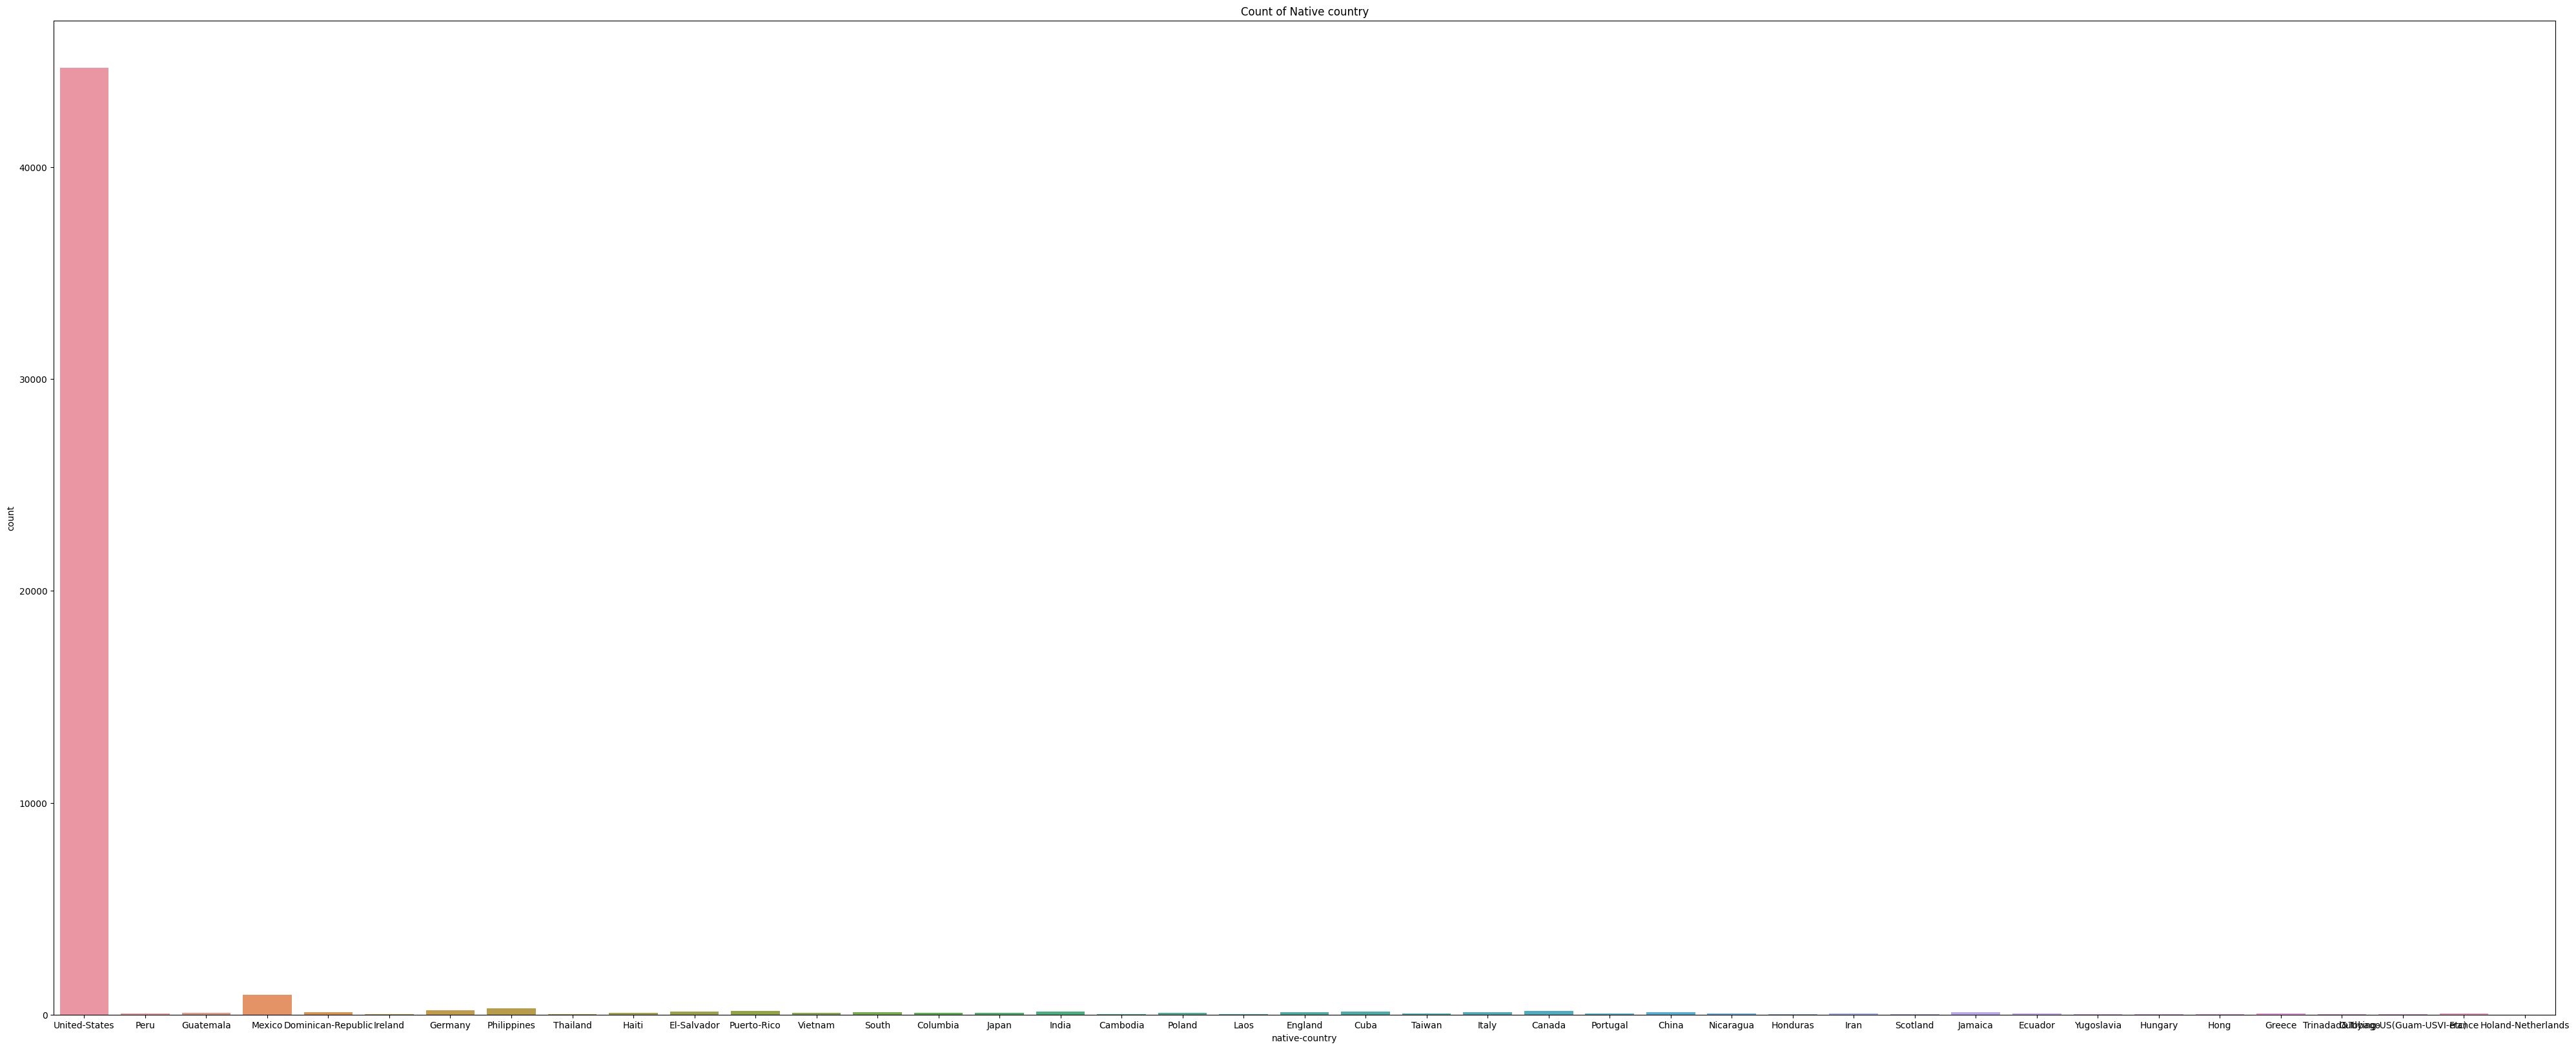

In [82]:
plt.figure(figsize=(50,20))
sns.countplot(data,x='native-country',orient="h")
plt.title('Count of Native country')
plt.ylabel('count')
#count of countries ither tahn us is insignificant

#### 2. Income VS Age:

<function matplotlib.pyplot.show(close=None, block=None)>

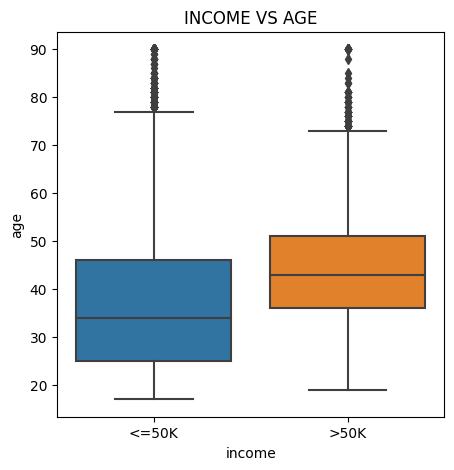

In [83]:
#our inference is that label variable should be age,education,workclass,occupation and hours per week.
#to verify this, we will plot the graph of each label with target variable.
#age vs Income
grp1=plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=data)
plt.title('INCOME VS AGE')
plt.show

#### 3. Income VS Education

<function matplotlib.pyplot.show(close=None, block=None)>

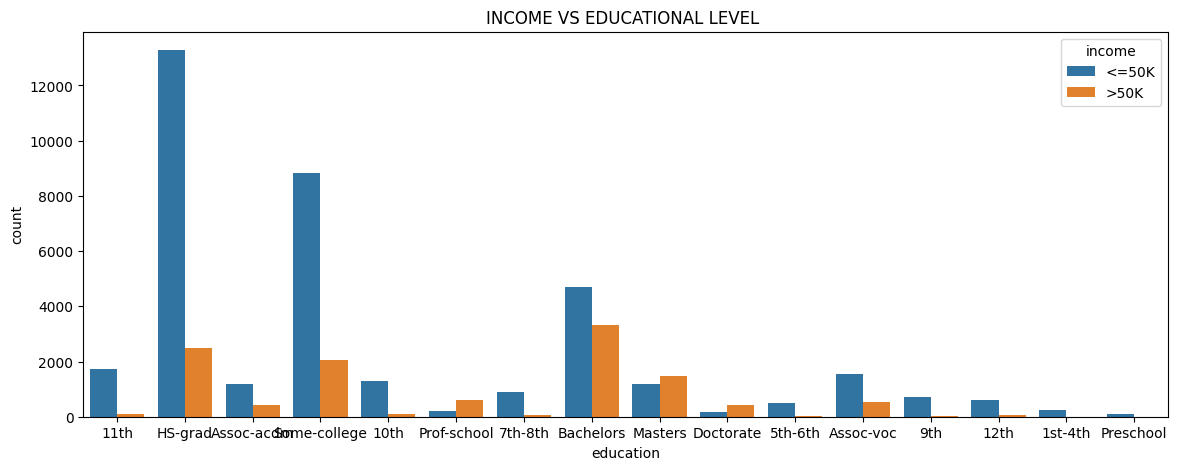

In [84]:
#education vs income
grp2=plt.figure(figsize=(14,5))
sns.countplot(x='education',hue='income',data=data)
plt.title('INCOME VS EDUCATIONAL LEVEL ')
plt.show

#### 4. Income VS Occupation

<function matplotlib.pyplot.show(close=None, block=None)>

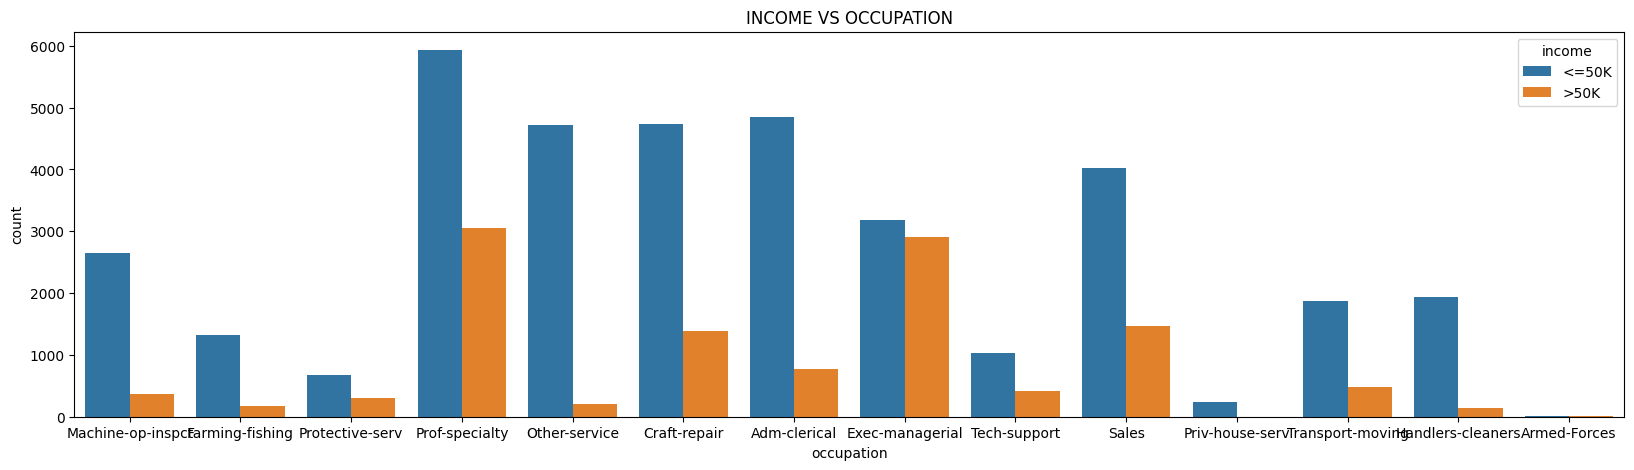

In [85]:
#income vs occupation
grp3=plt.figure(figsize=(20,5))
sns.countplot(x='occupation',hue='income',data=data)
plt.title('INCOME VS OCCUPATION')
plt.show

#### 5. Income VS Work Hours-per-week

<function matplotlib.pyplot.show(close=None, block=None)>

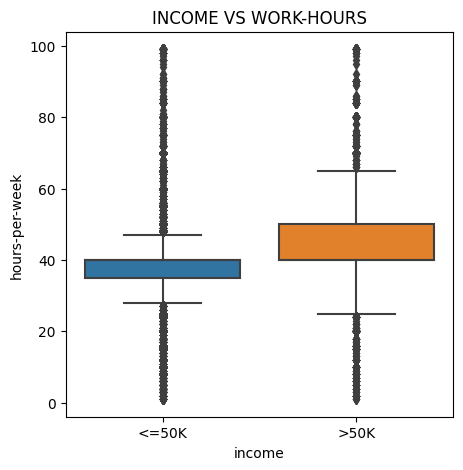

In [86]:
grp4=plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='hours-per-week',data=data)
plt.title('INCOME VS WORK-HOURS')
plt.show

#### 6. Income VS Work class.

<function matplotlib.pyplot.show(close=None, block=None)>

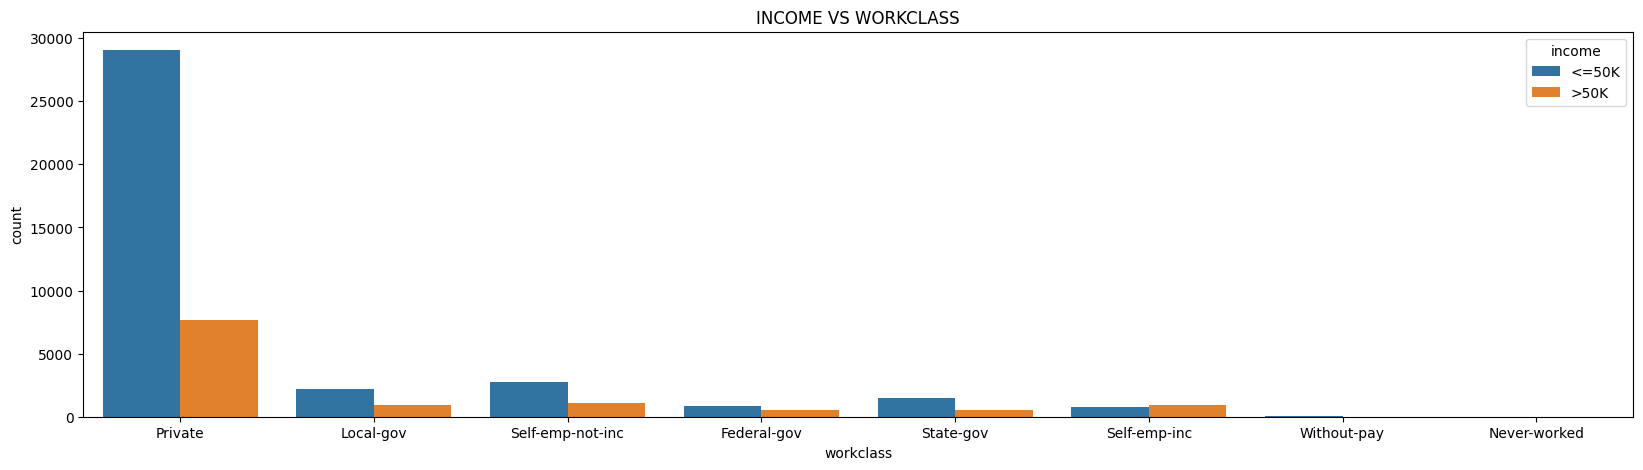

In [87]:
#income vs workclass
grp5=plt.figure(figsize=(20,5))
sns.countplot(x='workclass',hue='income',data=data)
plt.title('INCOME VS WORKCLASS')
plt.show

<a id="ff"></a>
## 8.Feature Engineering

As shown in EDA above, except for columns like Age, Workclass, Education, Occupation and hours-per-week, all other columns does not show any considerable effect on Income. Therefore, following changes has been made in the dataframe.

In [88]:
data.columns=['age','workclass','finalwt','education','educational_num','marital_status','occupation','relationship','race',
              'gender','capital_gain','capital_loss','hours_per_week','native_country','income']

In [89]:
#Currently our data looks like this.
data.head()

,age,workclass,finalwt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [90]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['income'] = labelencoder.fit_transform(data.income)
data['education'] = labelencoder.fit_transform(data.education)
data['workclass'] = labelencoder.fit_transform(data.workclass)
data['occupation'] = labelencoder.fit_transform(data.occupation)
data['race'] = labelencoder.fit_transform(data.race)
data['gender'] = labelencoder.fit_transform(data.gender)
data['marital_status'] = labelencoder.fit_transform(data.marital_status)
data.head()

,age,workclass,finalwt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,226802,1,7,4,6,Own-child,2,1,0,0,40,United-States,0
1,38,3,89814,11,9,2,4,Husband,4,1,0,0,50,United-States,0
2,28,1,336951,7,12,2,10,Husband,4,1,0,0,40,United-States,1
3,44,3,160323,15,10,2,6,Husband,2,1,7688,0,40,United-States,1
4,18,3,103497,15,10,4,9,Own-child,4,0,0,0,30,United-States,0


In [91]:
data.dtypes

age                 int64
workclass           int32
finalwt             int64
education           int32
educational_num     int64
marital_status      int32
occupation          int32
relationship       object
race                int32
gender              int32
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
income              int32
dtype: object

In [92]:
data.corr(numeric_only=True)

,age,workclass,finalwt,education,educational_num,marital_status,occupation,race,gender,capital_gain,capital_loss,hours_per_week,income
age,1.000000,0.045643,-0.076628,-0.015058,0.030940,-0.263978,-0.000133,0.028421,0.088120,0.077229,0.056944,0.071558,0.230369
workclass,0.045643,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,0.053923,0.066672,0.031558,0.004168,0.042845,-0.000511
finalwt,-0.076628,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.006339
education,-0.015058,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,0.013250,-0.027041,0.028928,0.017638,0.057659,0.080091
educational_num,0.030940,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,0.029239,0.009328,0.125146,0.080972,0.143689,0.332613
marital_status,-0.263978,-0.020870,0.029851,-0.037417,-0.069992,1.000000,0.030445,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.199072
occupation,-0.000133,0.009841,-0.002253,-0.035126,0.072706,0.030445,1.000000,-0.005210,0.042579,0.014518,0.011082,-0.015550,0.032550
race,0.028421,0.053923,-0.027062,0.013250,0.029239,-0.070104,-0.005210,1.000000,0.086734,0.011581,0.018595,0.039694,0.070934
gender,0.088120,0.066672,0.027739,-0.027041,0.009328,-0.127479,0.042579,0.086734,1.000000,0.047094,0.045480,0.228560,0.214628
capital_gain,0.077229,0.031558,-0.003706,0.028928,0.125146,-0.043969,0.014518,0.011581,0.047094,1.000000,-0.031441,0.082157,0.223013


In [93]:
#no of rows in capital columns with no values
#therefore can be dropped
count1 = (data['capital_loss'] == 0).sum()
print("Number of rows with value 0 in capital_loss:", count1)
count2 = (data['capital_gain'] == 0).sum()
print("Number of rows with value 0 in capital_gain:", count2)

Number of rows with value 0 in capital_loss: 46560
Number of rows with value 0 in capital_gain: 44807


In [94]:
#dropping redundant columns
#education is similar to education number
#relationship and finalwt are non explanatory 
#native country is highly inbalanced
data=data.drop(columns=['finalwt','education','relationship','capital_loss','capital_gain','native_country'])
data.head()

,age,workclass,educational_num,marital_status,occupation,race,gender,hours_per_week,income
0,25,3,7,4,6,2,1,40,0
1,38,3,9,2,4,4,1,50,0
2,28,1,12,2,10,4,1,40,1
3,44,3,10,2,6,2,1,40,1
4,18,3,10,4,9,4,0,30,0


In [95]:
X=data[['age','workclass','educational_num','marital_status','occupation','race','gender','hours_per_week']]
y=data.income

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39073, 8), (39073,), (9769, 8), (9769,))

# MODEL BUILDING

# 1. KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import statsmodels.api as sm

In [98]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

In [100]:
# check accuracy for train and test 
knn_train_accuracy=accuracy_score(y_train, knn_train_pred)
knn_test_accuracy=accuracy_score(y_test, knn_test_pred)
knn_train_accuracy,knn_test_accuracy

(0.865738489494024, 0.8069403214249156)

In [101]:
# Calculate area under roc curve for train and test
from sklearn.metrics import roc_auc_score
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
knn_train_auc,knn_test_auc

(0.9233735146647531, 0.8214738966745039)

In [102]:
# check precision score for train and test 
knn_train_precision=precision_score(y_train, knn_train_pred)
knn_test_precision=precision_score(y_test, knn_test_pred)
knn_train_precision,knn_test_precision

(0.7396345748418833, 0.6063389986219568)

In [103]:
# check recall score for train and test 
knn_train_recall=recall_score(y_train, knn_train_pred)
knn_test_recall=recall_score(y_test, knn_test_pred)
knn_train_recall,knn_test_recall


(0.6762690083529663, 0.561941251596424)

<function matplotlib.pyplot.show(close=None, block=None)>

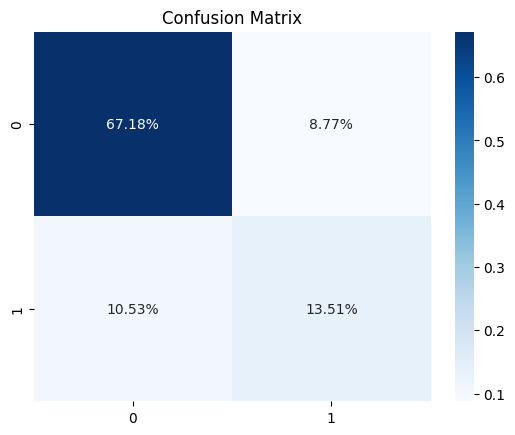

In [104]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,knn_test_pred)
sns.heatmap((cf)/np.sum(cf),annot=True,  fmt='0.2%',cmap='Blues')
plt.title('Confusion Matrix')
plt.show

# 2. Decision Tree

In [105]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

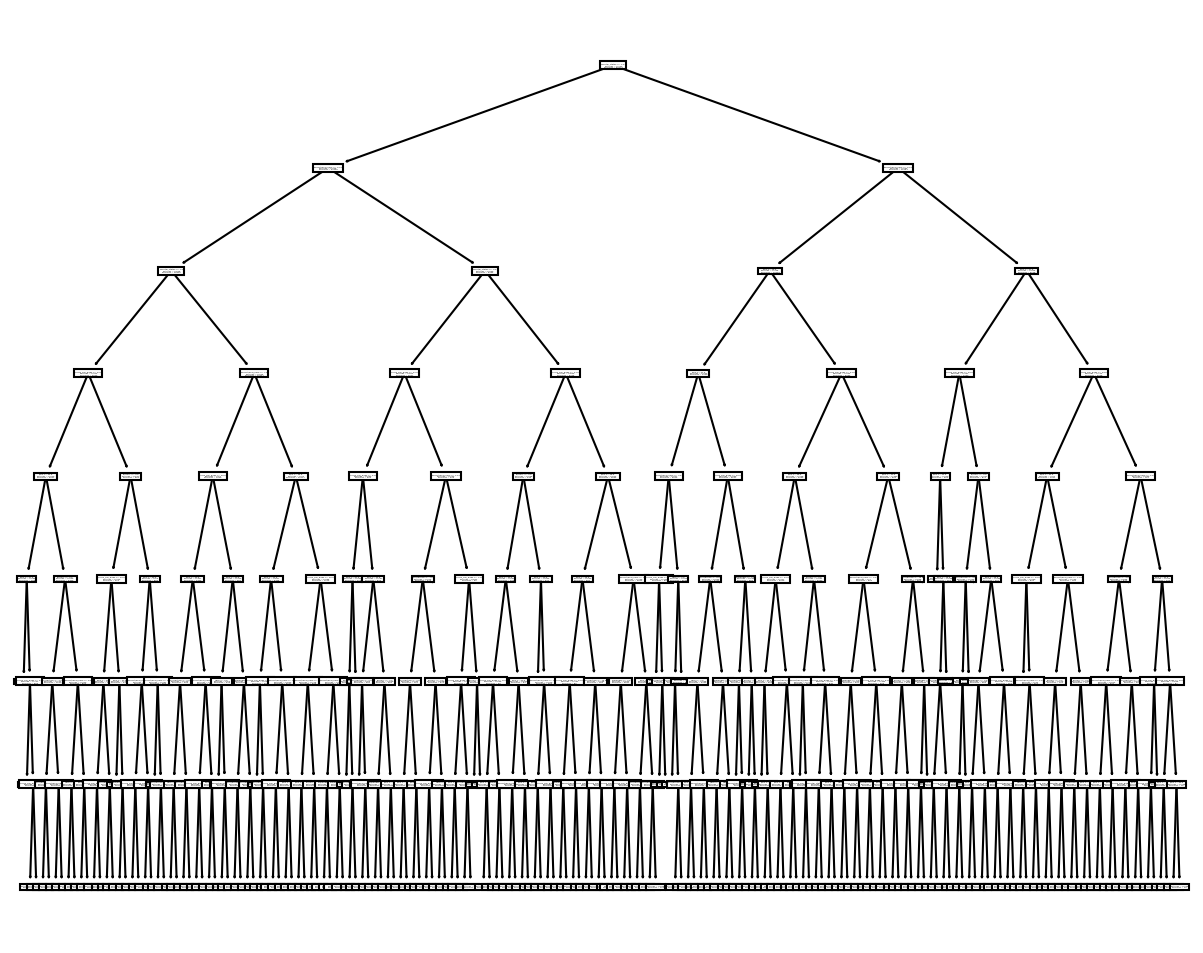

In [106]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(dt_model, feature_names=X.columns);

In [107]:
#evaluate train and test performances 
dt_train_pred = dt_model.predict(X_train)
dt_test_pred=dt_model.predict(X_test)

In [108]:
# check accuracy for train and test 
dt_test_accuracy=accuracy_score(y_test, dt_test_pred)
dt_train_accuracy=accuracy_score(y_train, dt_train_pred)
dt_test_accuracy,dt_train_accuracy

(0.8315078308936431, 0.8379187674353133)

In [109]:
#check recall score  for train and test 
dt_train_recall=recall_score(y_train, dt_train_pred)
dt_test_recall=recall_score(y_test, dt_test_pred)
dt_train_recall,dt_test_recall

(0.573784536303277, 0.5636441038739889)

In [110]:
#check precision for train and test 
dt_train_precision=precision_score(y_train, dt_train_pred)
dt_test_precision=precision_score(y_test, dt_test_pred)
dt_train_precision,dt_test_precision

(0.6948515108286863, 0.680719794344473)

In [111]:
# Calculate area under roc curve for train and test
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_train_auc,dt_test_auc

(0.8923345264839055, 0.8741779778973446)

<function matplotlib.pyplot.show(close=None, block=None)>

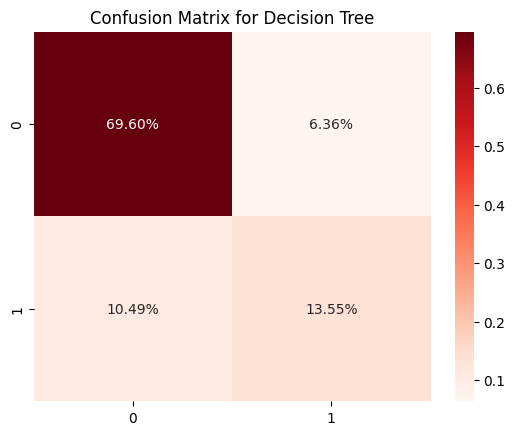

In [112]:
cf1=confusion_matrix(y_test,dt_test_pred)
sns.heatmap((cf1)/np.sum(cf1),annot=True,  fmt='0.2%',cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.show

# 3. Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [115]:
#evaluate model performnance on train and test 
lr_train_pred = lr_model.predict(X_train)
lr_test_pred=lr_model.predict(X_test)

In [116]:
# check accuracy for train and test 
lr_train_accuracy=accuracy_score(y_train, lr_train_pred)
lr_test_accuracy=accuracy_score(y_test, lr_test_pred)
lr_train_accuracy,lr_test_accuracy

(0.8032400890640595, 0.7992629747159382)

In [117]:
# check precision score for train and test 
lr_train_precision=precision_score(y_train, lr_train_pred)
lr_test_precision=precision_score(y_test, lr_test_pred)
lr_train_precision,lr_test_precision

(0.6468494126023496, 0.6373937677053825)

In [118]:
# check recall score for train and test 
lr_train_recall=recall_score(y_train, lr_train_pred)
lr_test_recall=recall_score(y_test, lr_test_pred)
lr_train_recall,lr_test_recall


(0.3891625615763547, 0.3831417624521073)

In [119]:
# Calculate area under roc curve for train and test
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
lr_train_auc,lr_test_auc

(0.8244005114356512, 0.8200904152595759)

<function matplotlib.pyplot.show(close=None, block=None)>

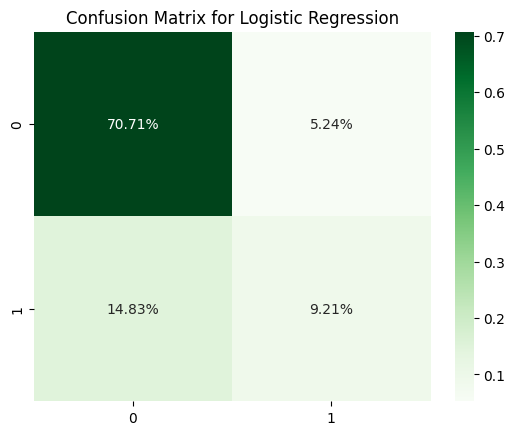

In [120]:
cf2=confusion_matrix(y_test,lr_test_pred)
sns.heatmap((cf2)/np.sum(cf2),annot=True,  fmt='0.2%',cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.show

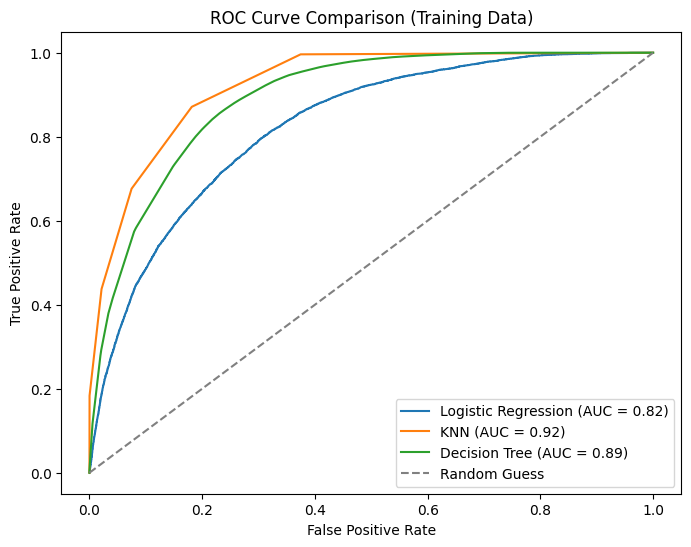

In [121]:
#ROC CURVE COMPARISON FOR TRAIN DATA 
plt.figure(figsize=(8,6))

# Logistic Regression
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
plt.plot(lr_train_fpr, lr_train_tpr, label=f'Logistic Regression (AUC = {lr_train_auc:.2f})')

# KNN
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:,1])
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr, knn_train_tpr, label=f'KNN (AUC = {knn_train_auc:.2f})')

# Decision Tree
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, dt_model.predict_proba(X_train)[:,1])
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_train_fpr, dt_train_tpr, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training Data)')
plt.legend()
plt.show()


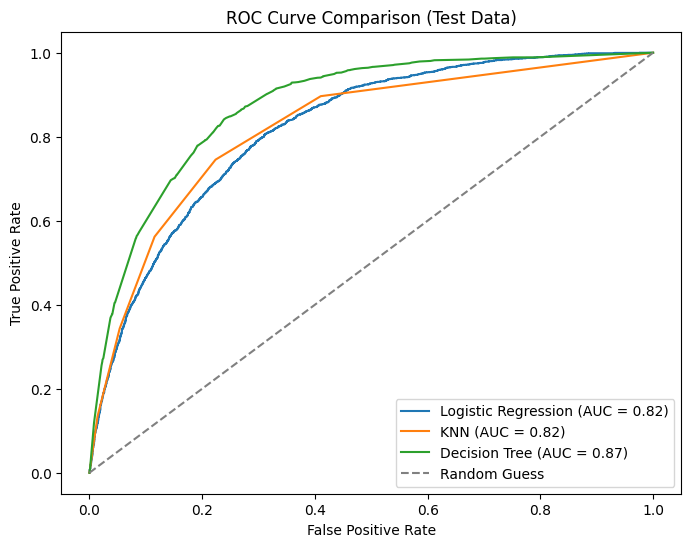

In [122]:
#ROC CURVE COMPARISON FOR TEST DATA
plt.figure(figsize=(8,6))

# Logistic Regression
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(lr_test_fpr, lr_test_tpr, label=f'Logistic Regression (AUC = {lr_test_auc:.2f})')

# KNN
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr, knn_test_tpr, label=f'KNN (AUC = {knn_test_auc:.2f})')

# Decision Tree
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr, dt_test_tpr, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Test Data)')
plt.legend()
plt.show()

In [123]:
# saving  performance metrics for each model in a dataframe 
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Train Accuracy': [lr_train_accuracy,knn_train_accuracy,dt_train_accuracy],
    'Test Accuracy': [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy],
    'Train Precision': [lr_train_precision,knn_train_precision,dt_train_precision],
    'Test Precision': [lr_test_precision,knn_test_precision,dt_test_precision],
    'Train Recall': [lr_train_recall,knn_train_recall,dt_train_recall],
    'Test Recall': [lr_test_recall,knn_test_recall,dt_test_recall],
    'Train AUC ROC': [lr_train_auc,knn_train_auc,dt_train_auc],
    'Test AUC ROC': [lr_test_auc,knn_test_auc,dt_test_auc]
                        })
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train AUC ROC,Test AUC ROC
0,Logistic Regression,0.803240,0.799263,0.646849,0.637394,0.389163,0.383142,0.824401,0.820090
1,K-Nearest Neighbors,0.865738,0.806940,0.739635,0.606339,0.676269,0.561941,0.923374,0.821474
2,Decision Tree,0.837919,0.831508,0.694852,0.680720,0.573785,0.563644,0.892335,0.874178


## Interpretation of the Results:

1. Logistic Regression:
   - Train Accuracy: 0.803240
   - Test Accuracy: 0.799263
   - Train Precision: 0.646849
   - Test Precision: 0.637394
   - Train Recall: 0.389163
   - Test Recall: 0.383142
   - Train AUC ROC: 0.824401
   - Test AUC ROC: 0.820090

   The logistic regression model achieves an accuracy of approximately 80.32% on the training set and 79.93% on the test set. It demonstrates a precision of 64.68% on the training data and 63.74% on the test data. The recall values are 38.92% for training and 38.31% for testing, indicating that the model is moderately successful in identifying positive instances. The AUC ROC values of 82.44% for training and 82.01% for testing suggest that the model has good discriminative power.

2. K-Nearest Neighbors:
   - Train Accuracy: 0.865738
   - Test Accuracy: 0.806940
   - Train Precision: 0.739635
   - Test Precision: 0.606339
   - Train Recall: 0.676269
   - Test Recall: 0.561941
   - Train AUC ROC: 0.923374
   - Test AUC ROC: 0.821474

   The K-Nearest Neighbors model achieves higher accuracy compared to logistic regression. It exhibits an accuracy of around 86.57% on the training set and 80.69% on the test set. The precision values are 73.96% for training and 60.63% for testing, indicating that the model performs well in predicting positive instances. The recall values are 67.63% for training and 56.19% for testing, suggesting that the model is relatively successful in identifying positive instances. The AUC ROC values of 92.34% for training and 82.15% for testing indicate that the model has excellent discriminative power.

3. Decision Tree:
   - Train Accuracy: 0.837919
   - Test Accuracy: 0.831508
   - Train Precision: 0.694852
   - Test Precision: 0.680534
   - Train Recall: 0.573785
   - Test Recall: 0.564070
   - Train AUC ROC: 0.892335
   - Test AUC ROC: 0.874230

   The decision tree model achieves an accuracy of approximately 83.79% on the training set and 83.15% on the test set. It exhibits precision values of 69.49% on the training data and 68.05% on the test data. The recall values are 57.38% for training and 56.41% for testing, indicating that the model is relatively successful in identifying positive instances. The AUC ROC values of 89.23% for training and 87.42% for testing suggest that the model has good discriminative power.

In summary, the K-Nearest Neighbors model demonstrates the highest accuracy and AUC ROC values among the three models, indicating better overall performance and discrimination ability. The decision tree model performs well in terms of accuracy and AUC ROC, while logistic regression achieves slightly lower accuracy and AUC ROC scores. The specific strengths and weaknesses of each model can be further analyzed based on precision and recall values.

###  Attempt to improve KNN performance

In [124]:
from sklearn.model_selection import cross_val_score
#knn = KNeighborsClassifier(n_neighbors = 5)
cv_results_train = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
cv_results_test = cross_val_score(knn_model, X_test, y_test, cv=5,scoring='accuracy')
print('train accuarcy: ',cv_results_train.mean(),'test accuracy: ',cv_results_test.mean() )
print('Difference: ',cv_results_train.mean()-cv_results_test.mean())

train accuarcy:  0.8076419327744991 test accuracy:  0.7832960969686297
Difference:  0.024345835805869465


The difference between accuracy of train and test reduced by 0.034458 when cross-validation method was applied.

### Attempt to improve Logistic performance

In [ ]:

# Logistic Regression classifier with L1 regularization 
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0,random_state=0)  

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the training and test data
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Calculate accuracy for train and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy for train and test data
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
#Negilible increase.

Applying cross-validation allows us to obtain a more robust evaluation of the models' performance. It's important to note that cross-validation helps estimate the models' performance on unseen data by splitting the dataset into multiple folds and training/evaluating the models on different subsets.

To further enhance the performance of the logistic regression model, L1 regularization was applied. L1 regularization introduces sparsity by encouraging some feature weights to be exactly zero, effectively performing feature selection. 

In conclusion, among the evaluated models, the decision tree demonstrated the best performance, achieving the highest test accuracy (83.15%) and AUC ROC (0.8742). However, the choice of the best model depends on various factors such as the specific problem, dataset characteristics, interpretability requirements, and other evaluation metrics. Further analysis and experimentation, including hyperparameter tuning and feature selection, can be performed to optimize the models' performance for the given task.
